<a href="https://colab.research.google.com/github/thesanchitadevi/Movie-Review-Analysis/blob/updated-notebook/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description

In [ ]:
# importing libraries
import numpy as np
# data manipulation = pandas
import pandas as pd

In [ ]:
data = pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
# first 5 datasets willl be show
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# last 5 datasets
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
#  to check any null value in column and row
data.isnull().any()

,0
review,False
sentiment,False


In [ ]:
data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
data.shape

(50000, 2)

In [ ]:
# to check the description of your data
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


# Text Normalization

Tokenization

In [ ]:
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
# word lemmatization
from nltk.corpus import stopwords
# word and sentence tokeinzation
from nltk.tokenize import word_tokenize, sent_tokenize
# word stemming
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# tokenization of text
from nltk.tokenize.toktok import ToktokTokenizer # import ToktokTokenizer from nltk.tokenize.toktok

tokenizers = ToktokTokenizer()
# settings english stopword
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
!pip install bs4 # install the required library
from bs4 import BeautifulSoup # import BeautifulSoup from bs4

import re
 #to do data scrapping, remove html tags
def noiseremoval_text(text):
  soup = BeautifulSoup(text, "html.parser")
  text = soup.get_text()
  text = re.sub('\[[^]]*\]', '', text)
  return text

In [ ]:
# apply function of review columns
data['review'] = data['review'].apply(noiseremoval_text)

<ipython-input-10-58aeb47c3002>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Stemming

In [ ]:
def stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = ' '.join([ps.stem(word) for word in text.split()])
  return text

In [ ]:
data['review'] = data['review'].apply(stemmer)

In [ ]:
data.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,a wonder littl production. the film techniqu i...,positive
2,i thought thi wa a wonder way to spend time on...,positive
3,basic there' a famili where a littl boy (jake)...,negative
4,"petter mattei' ""love in the time of money"" is ...",positive


# Removing stopwords

In [ ]:
def removing_stopwords(text, is_lower_case = False):
  # tokenize of text
  tokenizer = ToktokTokenizer()
  # settings english stopwords
  tokens = tokenizer.tokenize(text)
  tokens = [i.strip() for i in tokens]
  if is_lower_case:
    filtokens = [i for i in tokens if i not in stopwords]
  else:
    filtokens = [i for i in tokens if i.lower() not in stopwords]
  filtered_text = ' '.join(filtokens)
  return filtered_text

In [ ]:
data['review'] = data['review'].apply(removing_stopwords)

In [ ]:
data.head()

,review,sentiment
0,one review ha mention watch 1 oz episod ' hook...,positive
1,wonder littl production. film techniqu veri un...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic ' famili littl boy ( jake ) think ' zomb...,negative
4,"petter mattei ' "" love time money "" visual stu...",positive


# Train text split

In [ ]:
# split dataset
# train dataset
train_reviews = data.review[:30000]
# test dataset
test_reviews = data.review[30000:]

# Bag of words


In [ ]:
# import the CountVectorizer class
from sklearn.feature_extraction.text import CountVectorizer

#count vectorizer for bag of words
cv = CountVectorizer(min_df = 0.0, max_df = 1, binary = False, ngram_range = (1,3))
#transformed train reviews
cv_train = cv.fit_transform(train_reviews)
#transformed test reviews
cv_test = cv.transform(test_reviews)

print('BOW_cv_train:', cv_train.shape)
print('BOW_cv_test:', cv_test.shape)

BOW_cv_train: (30000, 4954557)
BOW_cv_test: (20000, 4954557)


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tf-idf vectorizer
tf = TfidfVectorizer(min_df=0.0, max_df=1, use_idf=True, ngram_range=(1,3))
tf_train = tf.fit_transform(train_reviews)
tf_test = tf.transform(test_reviews)

print('Tfidf_train:', tf_train.shape)
print('Tfidf_test:', tf_test.shape)

Tfidf_train: (30000, 4954557)
Tfidf_test: (20000, 4954557)


# Label Encoding

In [ ]:
# labeling the sentiment data
from sklearn.preprocessing import LabelEncoder

# perform label encoding
lebal = LabelEncoder()
sentiment_data = lebal.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000,)


In [ ]:
sentiment_data

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
train_data = data.sentiment[:30000]

In [ ]:
test_data = data.sentiment[30000:]

In [ ]:
# training the model
from sklearn.linear_model import LogisticRegression # import the LogisticRegression object

logistic = LogisticRegression(penalty= 'l2', max_iter = 500, C = 1, random_state=42) # changed Penalty to penalty
# fitting the model for bag of words
lr_bow = logistic.fit(cv_train, train_data)
print(lr_bow)


LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
# predicting the model for bag of words
lr_bow_predict = logistic.predict(cv_test)
print(lr_bow_predict)


['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [ ]:
# Accuracy score for bags of word
from sklearn.metrics import accuracy_score # import the accuracy_score function
# lr_bow_score = logistic.score(cv_test, test_data)
lr_bow_score = accuracy_score(test_data, lr_bow_predict)
print("lr_bow_score :", lr_bow_score)


lr_bow_score : 0.61655


In [ ]:
# fitting model fpr tf-idf
lr_tfidf = logistic.fit(tf_train, train_data)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
# predicting the model for tf-idf
lr_tfidf_predict = logistic.predict(tf_test)
print(lr_tfidf_predict)

['negative' 'negative' 'negative' ... 'negative' 'positive' 'positive']


In [ ]:
#Predictting the model of tf-idf features
lr_tfidf_score = accuracy_score(test_data, lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_tfidf_score : 0.743


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualizing Sentiment Distribution

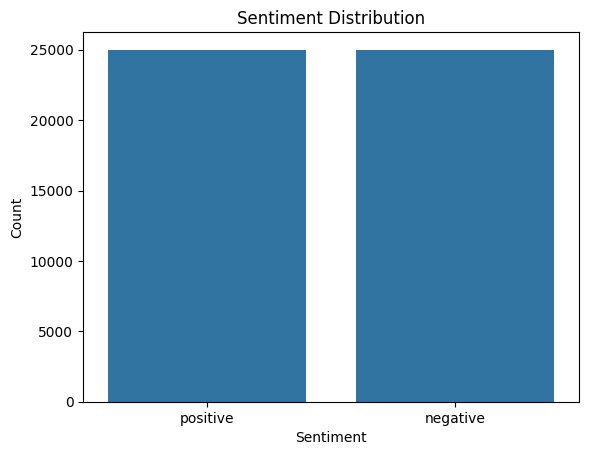

In [ ]:
# Plot the sentiment distribution
sns.countplot(x='sentiment', data=data)

# Add labels and title
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-39-dded3e736b01>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


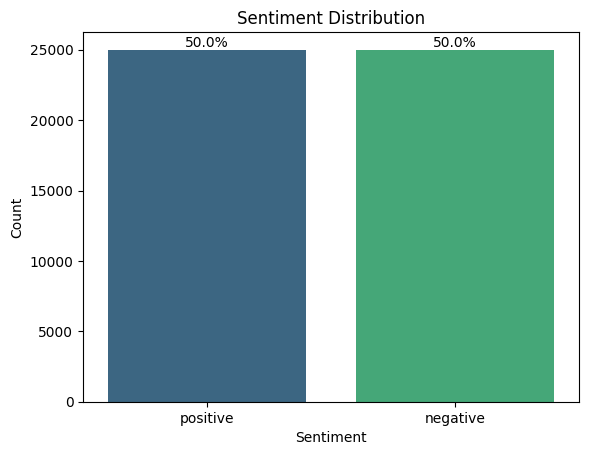

In [ ]:
# Plot the sentiment distribution with additional options
sns.countplot(x='sentiment', data=data, palette='viridis')

# Add labels
total = len(data)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


##  Confusion Matrix

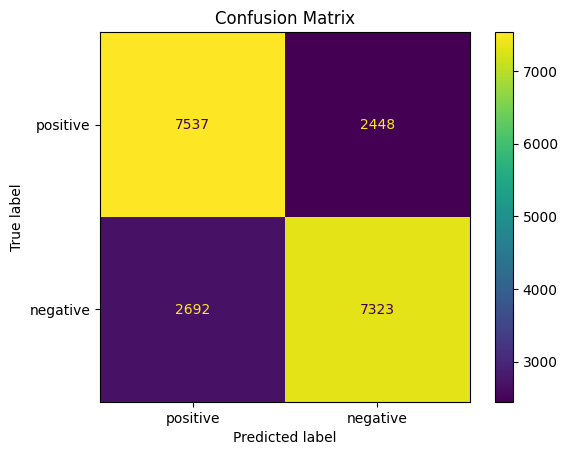

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
predictions = logistic.predict(tf_test)

# Confusion Matrix
cm = confusion_matrix(test_data, predictions, labels=['positive', 'negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'negative'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()


##  ROC Curve and AUC Score

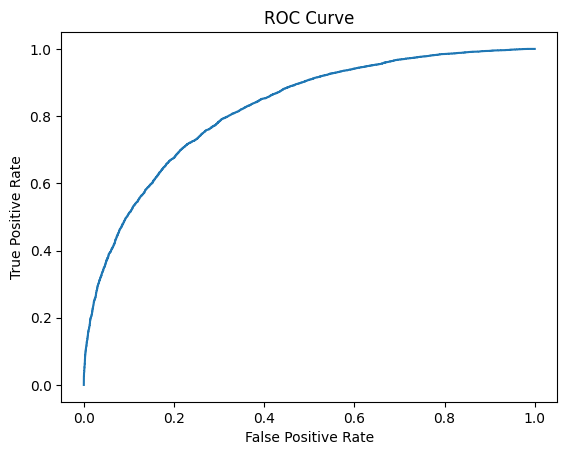

AUC Score: 0.8224327704737335


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you're doing binary classification (positive vs. negative)
fpr, tpr, thresholds = roc_curve(test_data, logistic.predict_proba(tf_test)[:, 1], pos_label='positive')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(test_data, logistic.predict_proba(tf_test)[:, 1])
print('AUC Score:', auc_score)


#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Different values for regularization strength
    'max_iter': [100, 200, 500, 1000]  # Different max iterations
}

# Initialize a Logistic Regression model
logistic = LogisticRegression(random_state=42)

# Perform grid search using cross-validation
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')

# Fit the model with the best hyperparameters
grid_search.fit(tf_train, train_data)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Best estimator (model with the best parameters)
best_model = grid_search.best_estimator_

# Use the best model to predict on the test set
predictions = best_model.predict(tf_test)

# Evaluate the performance of the tuned model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_data, predictions)
print(f"Tuned Model Accuracy: {accuracy}")


Best Parameters: {'C': 0.01, 'max_iter': 100}
Tuned Model Accuracy: 0.5075


# Adding more models

## 1. Train and Evaluate Multiple Models
### train different models and calculate their accuracy scores.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize models
logistic = LogisticRegression()
naive_bayes = MultinomialNB()
# svm = SVC()
random_forest = RandomForestClassifier()

# Train models on the training data
logistic.fit(tf_train, train_data)
naive_bayes.fit(tf_train, train_data)
# svm.fit(tf_train, train_data)
random_forest.fit(tf_train, train_data)

# Predict using each model on the test data
logistic_pred = logistic.predict(tf_test)
naive_bayes_pred = naive_bayes.predict(tf_test)
# svm_pred = svm.predict(tf_test)
random_forest_pred = random_forest.predict(tf_test)

# Calculate accuracy for each model
logistic_acc = accuracy_score(test_data, logistic_pred)
naive_bayes_acc = accuracy_score(test_data, naive_bayes_pred)
# svm_acc = accuracy_score(test_data, svm_pred)
random_forest_acc = accuracy_score(test_data, random_forest_pred)

# Store the accuracy results in a dictionary for easy comparison
accuracy_results = {
    'Logistic Regression': logistic_acc,
    'Naive Bayes': naive_bayes_acc,
    # 'SVM': svm_acc,
    'Random Forest': random_forest_acc
}

# Print out the accuracy of each model
for model, accuracy in accuracy_results.items():
    print(f"{model}: {accuracy:.4f}")


KeyboardInterrupt: 